In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 가져오기

In [3]:
bike = pd.read_csv('data/data/bike-sharing-demand/train.csv')
print(bike.shape)
print(bike.head())

(10886, 12)
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [56]:
bike_test = pd.read_csv('data/data/bike-sharing-demand/test.csv')

### datatime 컬럼 datetime 자료형으로 변환하고 연,월,일,시,분,초 6가지 컬럼으로 생성하기

In [15]:
# datetime 자료형으로 변환
bike['datetime'] = pd.to_datetime(bike['datetime'])
bike.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [59]:
bike_test['datetime'] = pd.to_datetime(bike_test['datetime'])
bike_test.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object

In [17]:
# 연,월,일,시,분,초 6가지 컬럼으로 생성하기
bike['year'] = bike['datetime'].dt.year
bike['month'] = bike['datetime'].dt.month
bike['day'] = bike['datetime'].dt.day
bike['hour'] = bike['datetime'].dt.hour
bike['minute'] = bike['datetime'].dt.minute
bike['second'] = bike['datetime'].dt.second
print(bike.head())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  second  
0       0       0  
1       0       0  
2       0     

In [60]:
bike_test['year'] = bike_test['datetime'].dt.year
bike_test['month'] = bike_test['datetime'].dt.month
bike_test['day'] = bike_test['datetime'].dt.day
bike_test['hour'] = bike_test['datetime'].dt.hour
bike_test['minute'] = bike_test['datetime'].dt.minute
bike_test['second'] = bike_test['datetime'].dt.second
print(bike_test.head())

             datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-01 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-01 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-01 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-01 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-01 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  year  month  day  hour  minute  second  
0        56    26.0027  2011      1    1     0       0       0  
1        56     0.0000  2011      1    1     1       0       0  
2        56     0.0000  2011      1    1     2       0       0  
3        56    11.0014  2011      1    1     3       0       0  
4        56    11.0014  2011      1    1     4       0       0  


### year, month, day, hour, minute, second 데이터 개수 시각화하기

<Axes: xlabel='second', ylabel='count'>

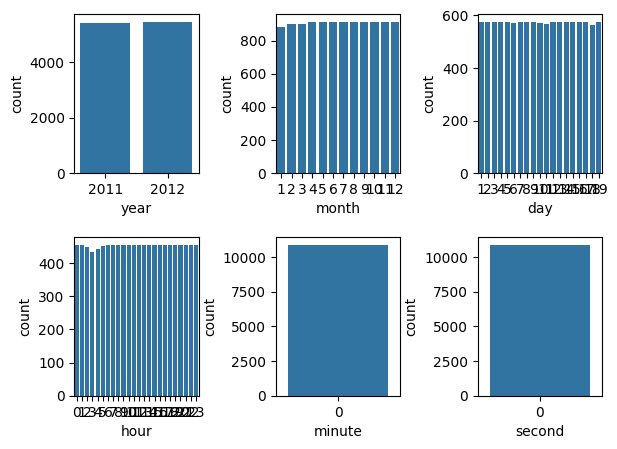

In [26]:
fig, axes = plt.subplots(2,3)
fig.tight_layout(pad=2.5)
sns.countplot(data = bike, x = bike['year'], ax= axes[0,0])
sns.countplot(data = bike, x = bike['month'], ax= axes[0,1])
sns.countplot(data = bike, x = bike['day'], ax= axes[0,2])
sns.countplot(data = bike, x = bike['hour'], ax= axes[1,0])
sns.countplot(data = bike, x = bike['minute'], ax= axes[1,1])
sns.countplot(data = bike, x = bike['second'], ax= axes[1,2])

위의 그래프는 연,월,일,시,분,초의 각 시기,시간대 별 총 데이터가 어느 정도 있는지 알 수 있는 데이터이다.
분과 초 데이터에 따르면 분과 초는 항상 0의 값을 가진다는 것을 알 수 있다. 또한 일의 데이터를 보면 1일부터 19일까지만 존재한다는 것도 알 수 있다.

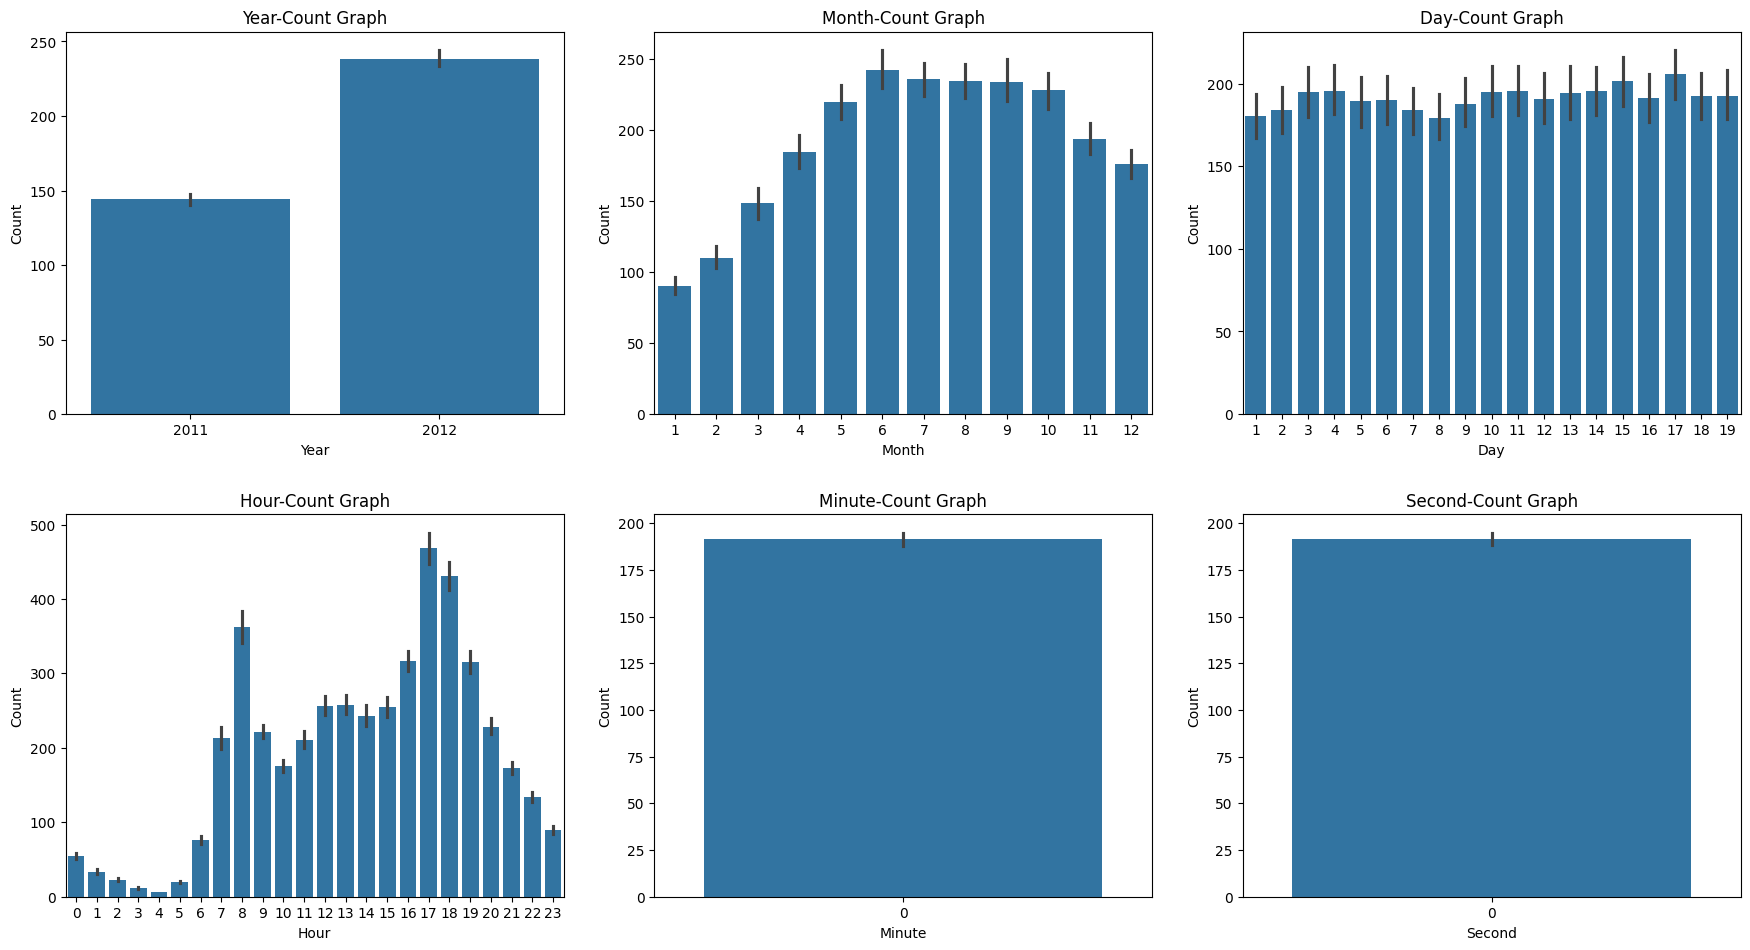

In [28]:
fig, ((ax1,ax2,ax3),(ax4,ax5, ax6)) = plt.subplots(2,3)
fig.set_size_inches(18,10)
sns.barplot(data = bike, x = 'year', y = 'count', ax = ax1)
sns.barplot(data = bike, x = 'month', y = 'count', ax = ax2)
sns.barplot(data = bike, x = 'day', y = 'count', ax = ax3)
sns.barplot(data = bike, x = 'hour', y = 'count', ax = ax4)
sns.barplot(data = bike, x = 'minute', y = 'count', ax = ax5)
sns.barplot(data = bike, x = 'second', y = 'count', ax = ax6)


ax1.set(xlabel = 'Year', ylabel = "Count", title = "Year-Count Graph" )
ax2.set(xlabel = 'Month', ylabel = "Count", title = "Month-Count Graph" )
ax3.set(xlabel = 'Day', ylabel = "Count", title = "Day-Count Graph" )
ax4.set(xlabel = 'Hour', ylabel = "Count", title = "Hour-Count Graph" )
ax5.set(xlabel = 'Minute', ylabel = "Count", title = "Minute-Count Graph" )
ax6.set(xlabel = 'Second', ylabel = "Count", title = "Second-Count Graph" )
fig.tight_layout(pad = 2.5)

* 맨 왼쪽 위의 연도별 그래프를 보면 연도가 증가함에따라 대여량도 증가한 것을 볼 수 있다.
<br>
* 월별 그래프에 따르면 1월부터 6월까지는 대여량이 증가하다가 7-9월까지는 6월보다는 살짝 감소하나 비슷한 대여량을 보이다 10월부터 대여량이 감소하는 것을 알 수 있다. 이를 보면 계절에 따른 관계가 있을 것으로 예상된다.
<br>
* 일별 그래프로는 큰 상관관계를 유추해낼 수 있을 것 같지 않다.
<br>
* 시간별 대여량 그래프에 따르면 아침 7시에 갑자기 증가하다가 다시 오후 5시쯤 갑자기 증가하는 것을 보면 사람들의 통근시간과 관련이 있을 것으로도 보인다. 또한 이 시간별 그래프는 휴일과 평일을 나눠서 분석해봐도 좋을 것 같다.



계절에 따른 대여량, 날씨에 따른 대여량, 휴일에 따른 대여량, 평일에 따른 대여량 살펴보기

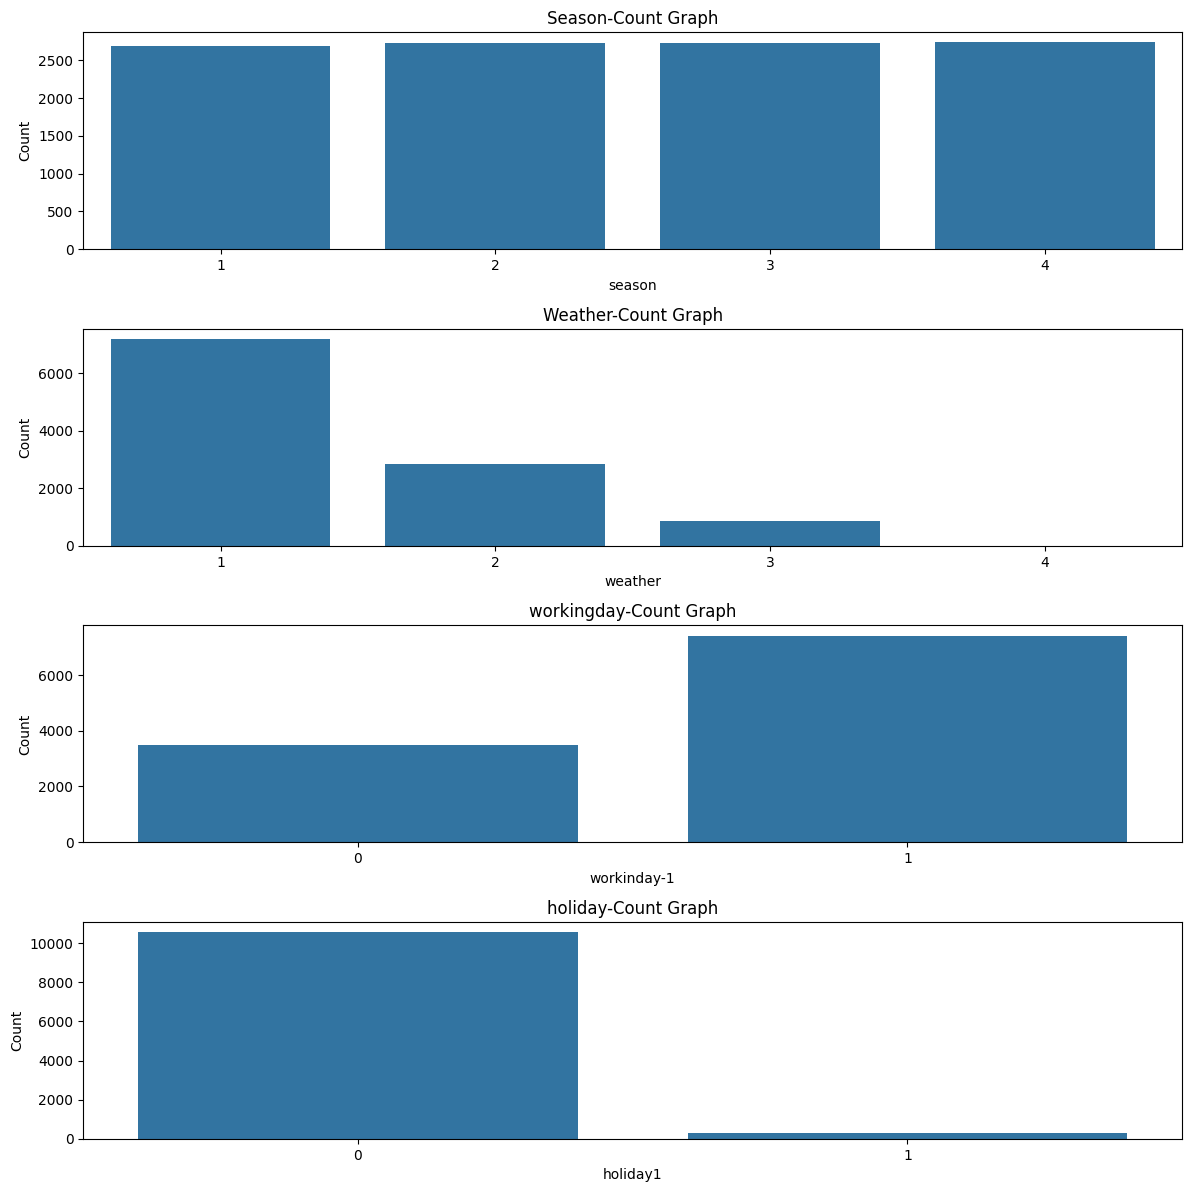

In [54]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1)
fig.set_size_inches(12,12)
sns.countplot(data = bike, x = bike['season'], ax= ax1)
sns.countplot(data = bike, x = bike['weather'], ax= ax2)
sns.countplot(data = bike, x = bike['workingday'], ax= ax3)
sns.countplot(data = bike, x = bike['holiday'], ax= ax4)
# sns.barplot(data = bike, x = "season", y = "count",  ax = ax1)
# sns.barplot(data = bike, x = "weather", y = "count", ax = ax2)
# sns.barplot(data = bike, x = 'workingday', y = 'count', ax = ax3)
# sns.barplot(data = bike, x = "holiday", y = 'count', ax = ax4)

ax1.set(xlabel = 'season', ylabel = "Count", title = "Season-Count Graph" )
ax2.set(xlabel = 'weather', ylabel = "Count", title = "Weather-Count Graph" )
ax3.set(xlabel = 'workinday-1', ylabel = "Count", title = "workingday-Count Graph" )
ax4.set(xlabel = 'holiday1', ylabel = "Count", title = "holiday-Count Graph" )
fig.tight_layout(pad = 1.0)

In [55]:
bike.loc[bike.weather == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,0,0


* 계절별 대여량 그래프에 따르면 가을철에 가장 큰 대여량을 보여주고 여름도 대체로 높은 대여량을 보여준다 봄철의 대여량이 가장 적다는 것을 알 수 있다.
<br>
<br>
* 날씨에 따른 대여량을 보면 맑은 날 가장 대여량이 크고 그 다음으로 흐린 날이 그 다음으로 대여량이 많은 것을 볼 수 있다.
* 날씨가 4일때의 데이터는 단 1개 존재하므로 3과 합쳐도 될 것이라고 생각한다.
<br>
<br>
* 평일 대여량이 휴일 대여량보다 더 높다.
* 하지만 workingday의 0 값과 holiday의 1의 값이 다른 것으로 보아 일하지 않는 날과 휴일이 다른 데이터로 존재하는 듯하다.
* 이 부분에 대해 어떻게 처리해야할까? 먼저 시간에 따른 workingday 그래프와 holiday그래프를 확인한 후 생각해보자

In [64]:
# 날씨 4를 3으로 바꿔주기
bike.loc[bike["weather"] == 4, "weather"] = 3
bike_test.loc[bike_test["weather"] == 4, "weather"] = 3

### 시간에 따른 workingday, holiday 그래프

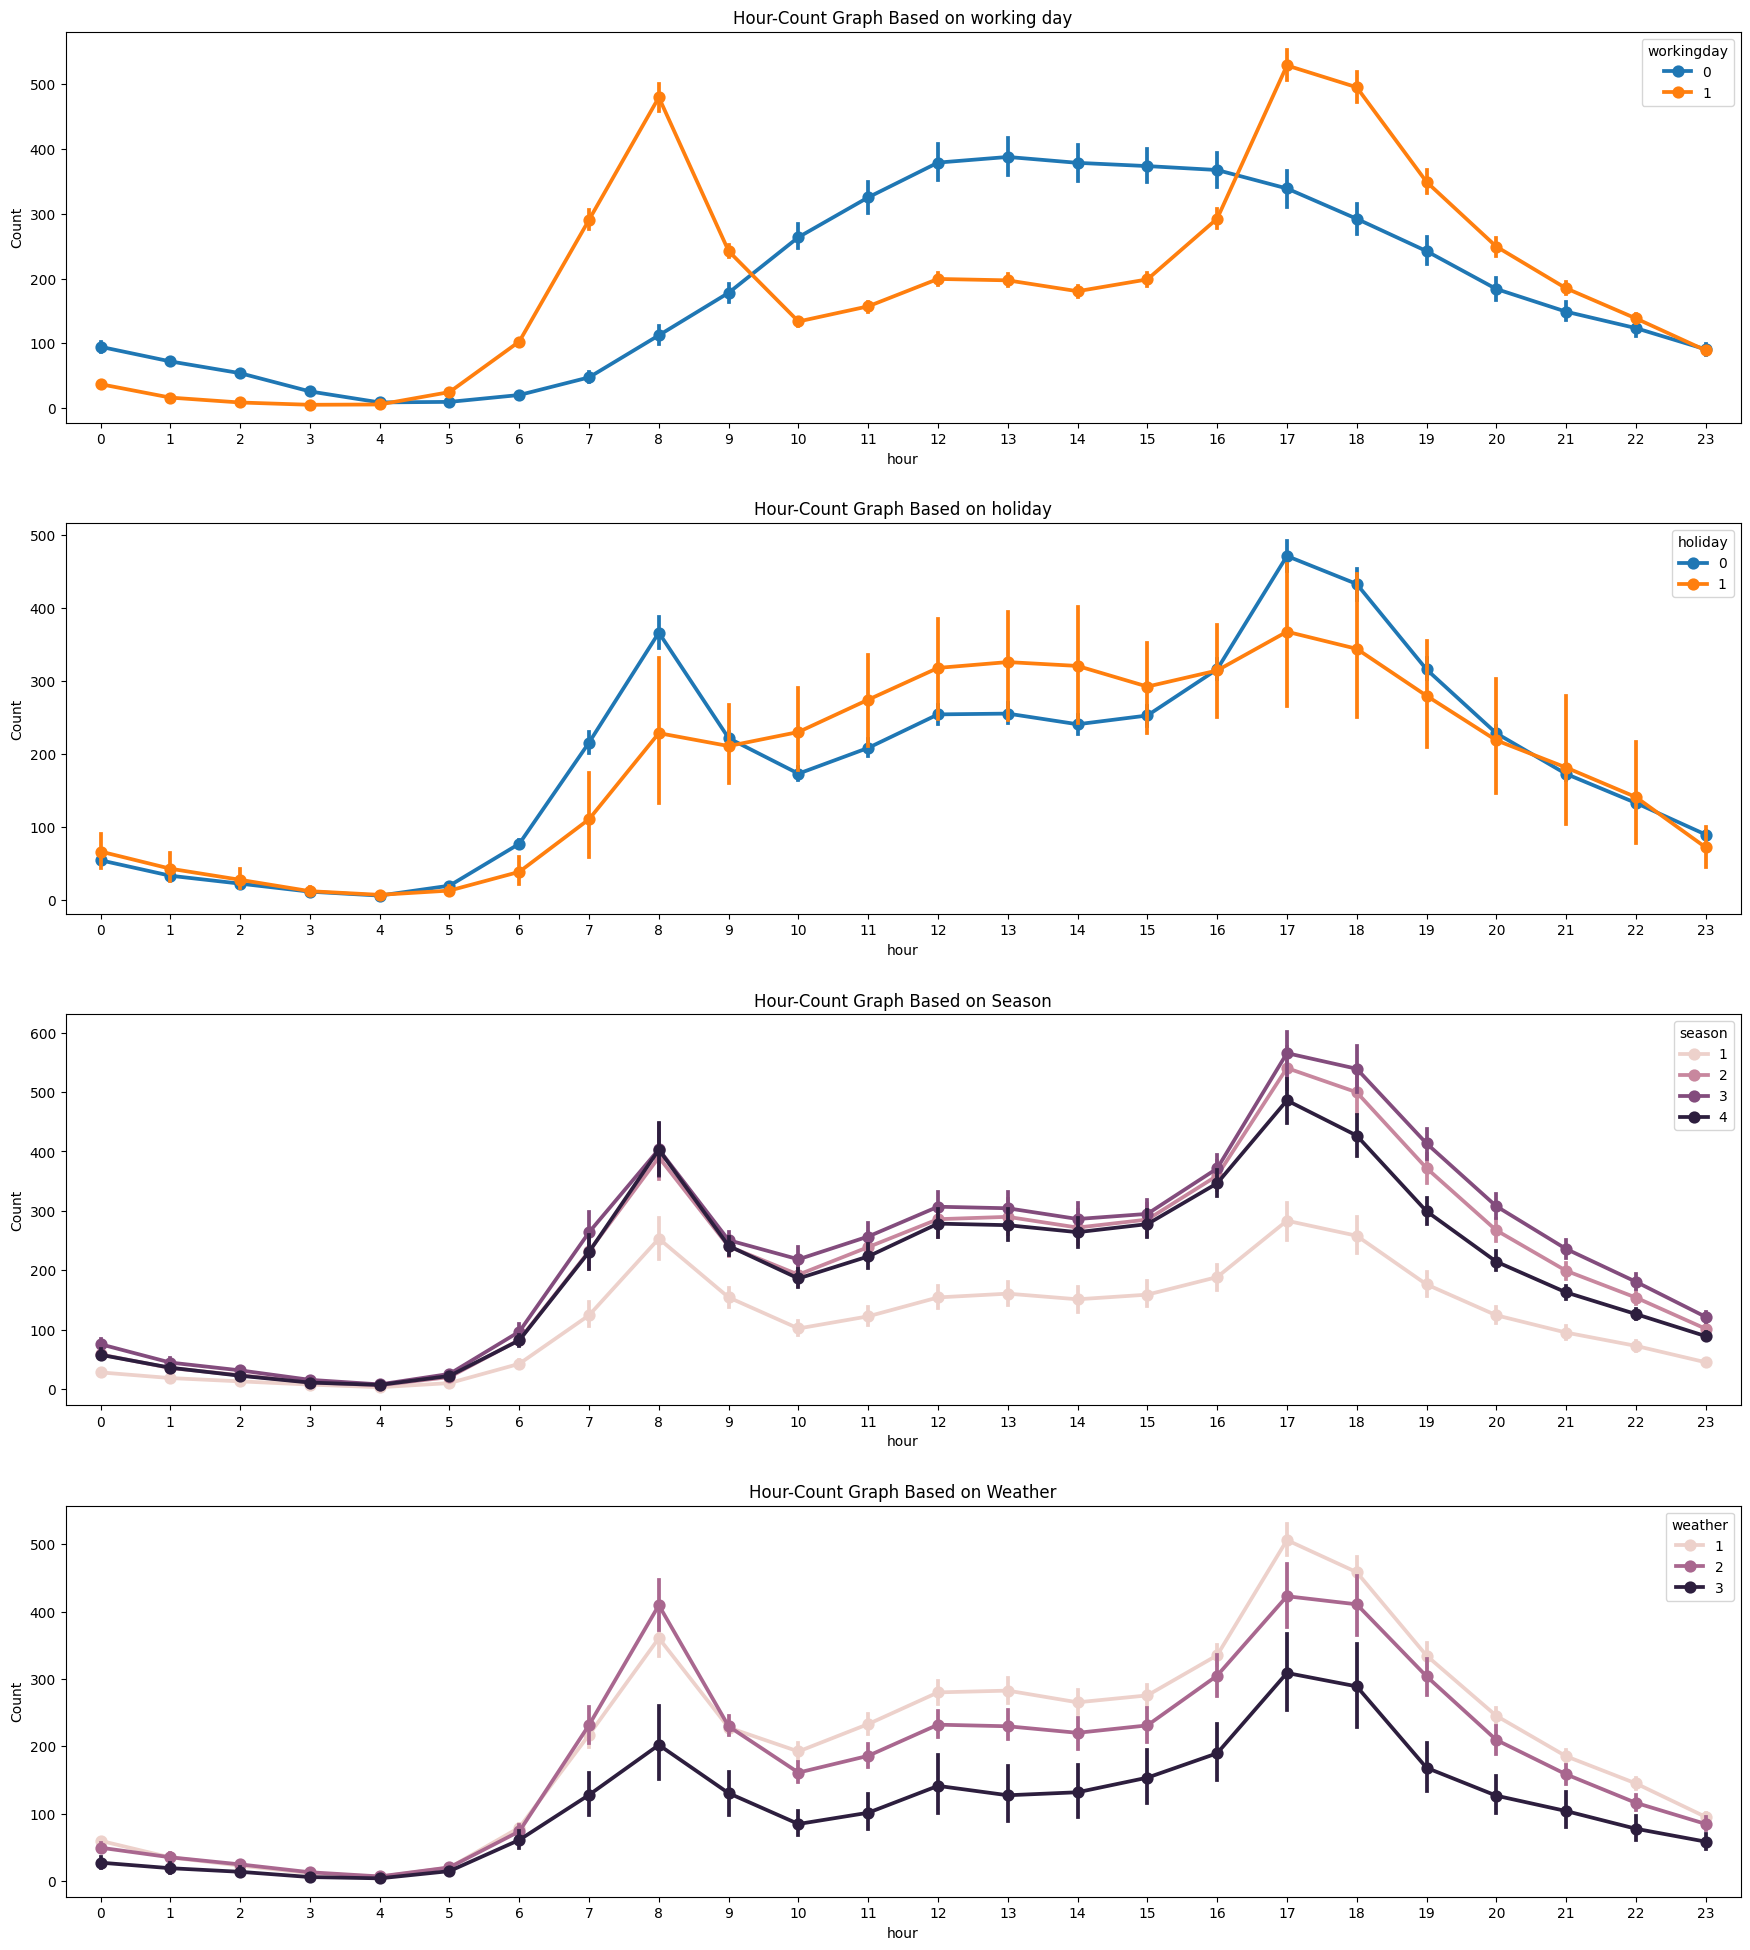

In [72]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1)
fig.set_size_inches(18, 20)
sns.pointplot(data = bike, x = "hour", y = "count", hue = "workingday", ax = ax1)
sns.pointplot(data = bike, x = "hour", y = "count", hue = "holiday", ax = ax2)
sns.pointplot(data = bike, x = "hour", y = "count", hue = "season", ax = ax3)
sns.pointplot(data = bike, x = "hour", y = "count", hue = "weather", ax = ax4)

ax1.set(xlabel = 'hour', ylabel = "Count", title = "Hour-Count Graph Based on working day" )
ax2.set(xlabel = 'hour', ylabel = "Count", title = "Hour-Count Graph Based on holiday" )
ax3.set(xlabel = 'hour', ylabel = "Count", title = "Hour-Count Graph Based on Season" )
ax4.set(xlabel = 'hour', ylabel = "Count", title = "Hour-Count Graph Based on Weather" )
fig.tight_layout(pad = 2.5)

위 두 그래프는 휴일과 평일을 바탕으로 한 시간별 대여량인데 위에 그래프는 평일이 1의 값, 아래의 그래프는 휴일이 1의 값을 가지는 그래프이다.
사실상 두 그래프는 비슷한 것을 보여준다.
* 평일 시간대의 대여량 그래프는 아침 7-8시 사이에 급증하고 다시 오후 4-5시 사이에 급증한다
* 휴일 시간대의 대여량 그래프는 오후로 갈수록 완만하게 증가하다 저녁시간이 되면 대여량이 줄어든다
* 이 두 특징을 보아 평일 시간대는 통근시간대에 대여량이 느는 것으로 보여지고 휴일 시간대는 낮시간에 대여량이 증가한다는 것을 알 수 있다.

* workingday데이터의 0의값들과 holiday 데이터의 1의 값들이 비슷한 양상을 보여주고 있는것으로 보아
workingday의 1번값들과 holiday의 0의 값인 데이터들을 workingday로 간주하고 workingday의 0값과 holiday의 1값을 가진 데이터들을 not_workingday로 간주하자.
<br>
<br>
* 봄의 대여량이 가장 적었던 것처럼 계절별 시간에 따른 대여량에서도 봄의 대여량이 가장 적고 여름과 가을이 높은 대여량을 보여준다.
<br>
<br>
*날씨별 시간에 따른 대여량에서는 4의 값을 가진 데이터를 3으로 바꿔준 이후의 데이터에서도 날씨가 가장 좋은 1이 가장 높은 대여량을 날씨가 가장 좋지않은 3에서 가장 낮은 대여량을 보여준다.

In [70]:
# make workingday and not_workingday data more specifically in train and test data
bike.loc[(bike.workingday ==1) & (bike.holiday == 0), "workingday"] = 1
bike["not_workingday"] = np.zeros(bike.shape[0])
bike.loc[(bike.workingday == 0) & (bike.holiday == 1), "not_workingday"] = 1
print(bike.not_workingday.value_counts())
print(bike.not_workingday.value_counts().sum() == bike.shape[0])

not_workingday
0.0    10575
1.0      311
Name: count, dtype: int64
True


In [71]:
bike_test.loc[(bike_test.workingday ==1) & (bike_test.holiday == 0), "workingday"] = 1
bike_test["not_workingday"] = np.zeros(bike_test.shape[0])
bike_test.loc[(bike_test.workingday == 0 )& (bike_test.holiday == 1), "not_workingday"] = 1
print(bike_test.not_workingday.value_counts())
print(bike_test.not_workingday.value_counts().sum() == bike_test.shape[0])

not_workingday
0.0    6304
1.0     189
Name: count, dtype: int64
True


### 박스플롯으로 계절, 날씨, 휴일, 평일별 대여량 이상치 해석하기

[Text(0.5, 0, 'Holiday -1'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Count based on Holiday')]

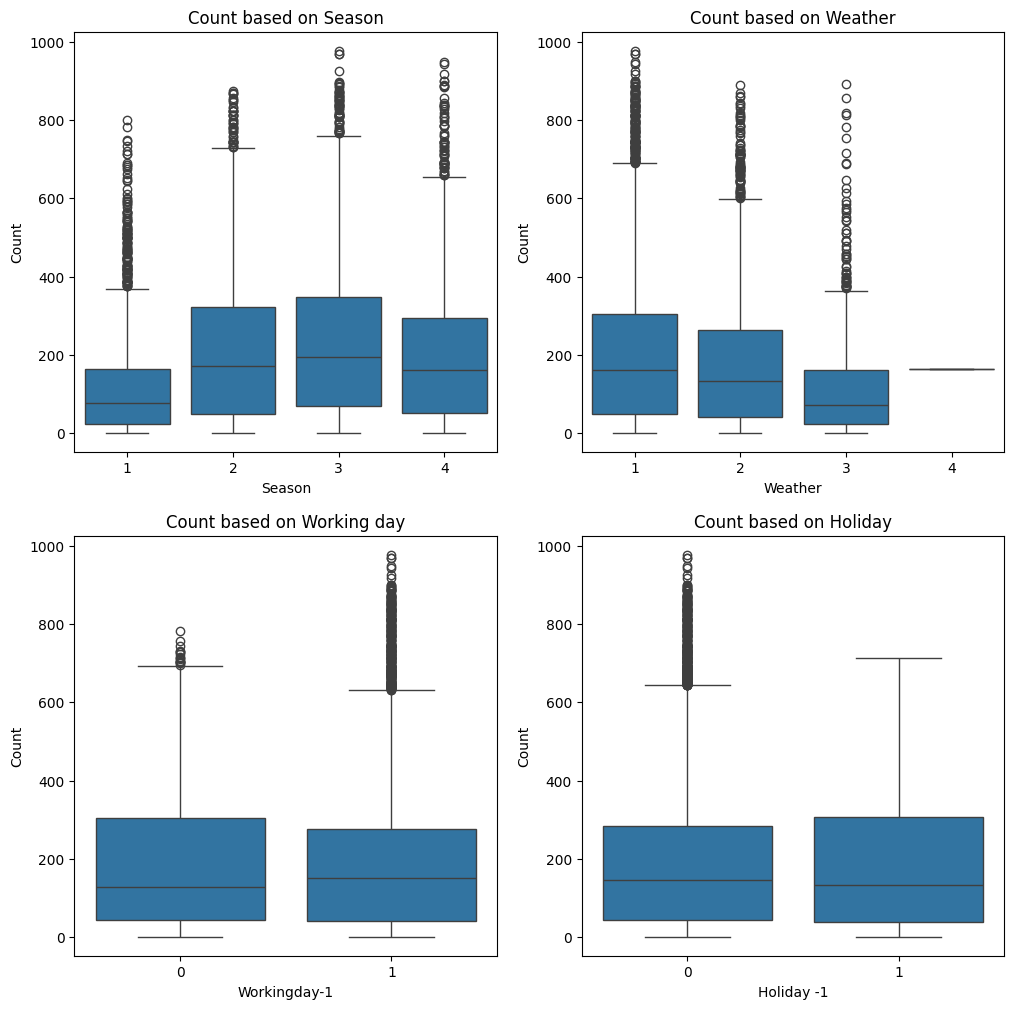

In [41]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(12,12)
sns.boxplot(data = bike, x = 'season', y = 'count', orient = 'v', ax = axes[0][0])
sns.boxplot(data = bike, x = 'weather',y = 'count', orient = 'v', ax = axes[0][1])
sns.boxplot(data = bike, x = 'workingday',y = 'count', orient = 'v', ax = axes[1][0])
sns.boxplot(data = bike, x = 'holiday',y = 'count', orient = 'v', ax = axes[1][1])

axes[0][0].set(xlabel = 'Season', ylabel = "Count", title = "Count based on Season")
axes[0][1].set(xlabel = 'Weather', ylabel = 'Count', title = 'Count based on Weather')
axes[1][0].set(xlabel = 'Workingday-1', ylabel = 'Count', title = "Count based on Working day")
axes[1][1].set(xlabel = 'Holiday -1', ylabel = 'Count', title = "Count based on Holiday")

해석써야하는데 솔직히 박스플랏 데이터 해석 어케할지 모르겠음 일단 지금은 건너뛰기

### 기온, 습도, 풍속, 등록된 사람, 등록되지 않은 사람과 대여량의 연관성 확인

In [43]:
bike_corr = bike[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]
corr = bike_corr.corr(numeric_only = True)
corr

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


<Axes: title={'center': 'Heatmap of temp, humidity, windspeed, casual, registered, and counter'}>

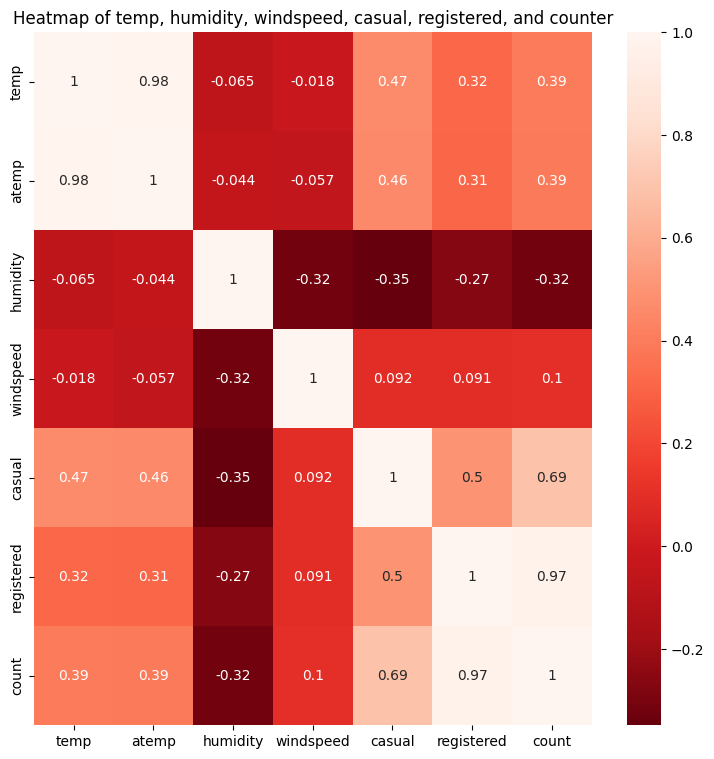

In [44]:
plt.figure(figsize=(9,9))
plt.title("Heatmap of temp, humidity, windspeed, casual, registered, and counter")
sns.heatmap(corr, annot = True, cmap = 'Reds_r')

히트맵을 통해 대여량과 온도, 습도, 풍속, 등록하지 않은 사람, 등록한 사람과의 연관성을 볼 수 있다.
* 온도, 습도, 풍속과 대여량에는 큰 연관성이 없어보인다.
* 자전거를 정기적으로 대여하는 사람들과 대여량의 연관성이 가장 큰 것으로 보인다.

<br>
하지만 test데이터에는 casual과 register이 없기 때문에 train데이터에서 casaul과 register feature은 빼기로하자.

### 온도, 습도, 풍속과 대여량의 관계를 산점도를 통해 확인해 보자

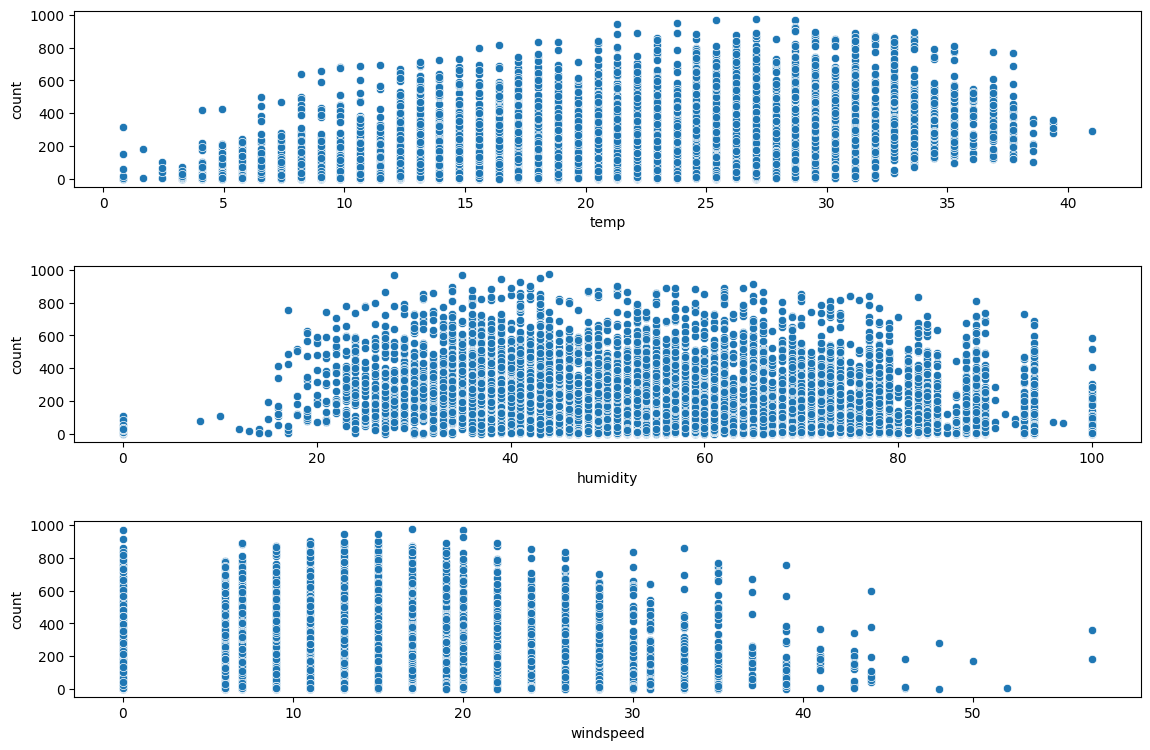

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.set_size_inches(12, 8)
sns.scatterplot(data = bike, x = 'temp', y = 'count', ax = ax1)
sns.scatterplot(data = bike, x = 'humidity', y = 'count', ax = ax2)
sns.scatterplot(data = bike, x = 'windspeed', y = 'count', ax = ax3)

fig.tight_layout(pad = 2.5)

* 온도가 낮거나 매우 높으면 대여량이 높지 않고 중간정도의 온도때 가장 많은 대여량이 나타난다.
* 습도와 대여량에는 큰 연관성은 없어보인다.
* 풍속이 높을수록 대여량은 떨어진다.
* 풍속 데이터에 0의 값이 너무 많은 것을 볼 수 있다. 이는 정확한 데이터가 아닌 것으로 추측된다. 나중에 feature engineering에서 0의 값들을 대체하는 값으로 변환시켜야한다고 생각한다.

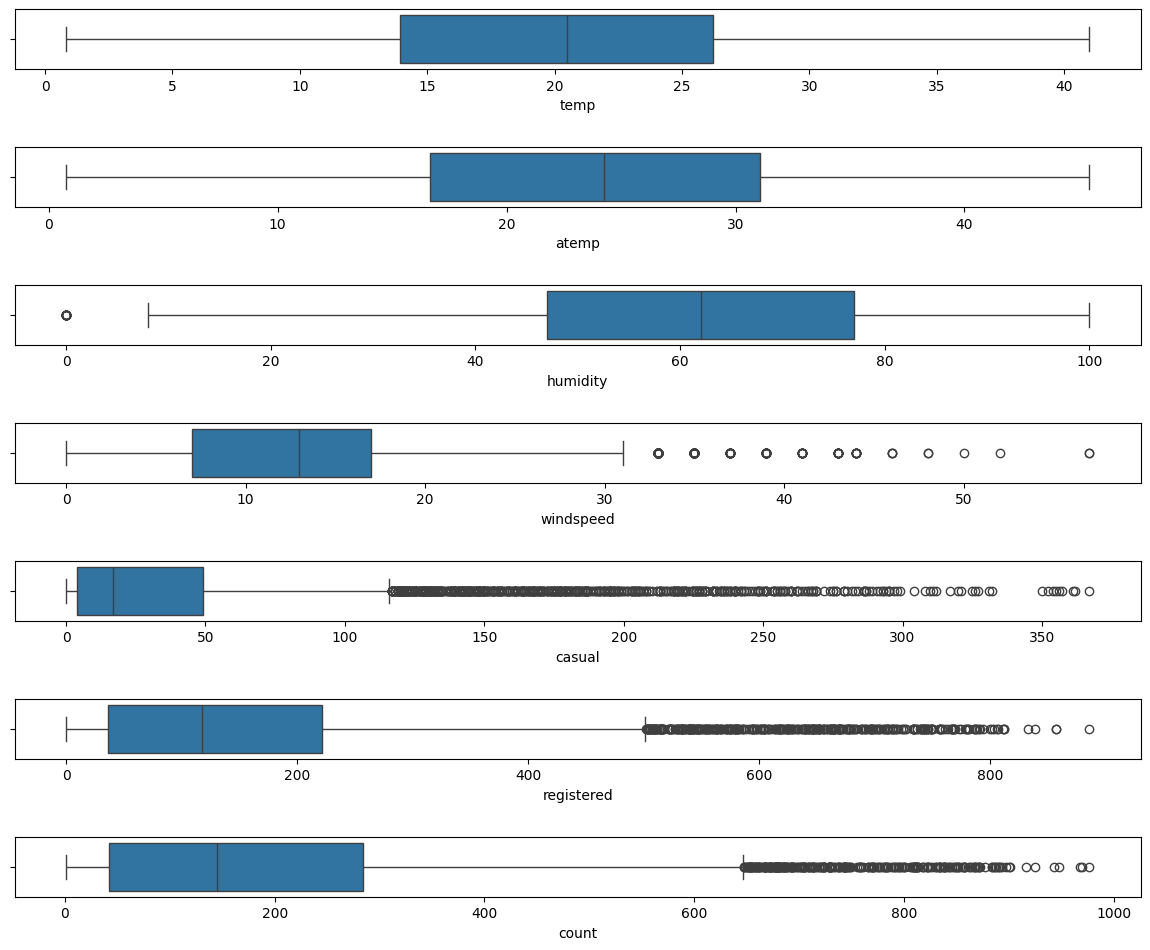

In [48]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows = 7, figsize = (12,10))
sns.boxplot(data = bike, x = 'temp', ax = ax1)
sns.boxplot(data = bike, x = 'atemp', ax = ax2)
sns.boxplot(data = bike, x = 'humidity', ax = ax3)
sns.boxplot(data = bike, x = 'windspeed', ax = ax4)
sns.boxplot(data = bike, x = 'casual', ax = ax5)
sns.boxplot(data = bike, x = 'registered', ax = ax6)
sns.boxplot(data = bike, x = 'count', ax = ax7)
fig.tight_layout(pad = 2.5)

### 풍속 0값을 대체값으로 전환하기
하려고했으나 풍속으로 인한 대여량 관계가 그렇게 크지 않은것으로 보아 그냥 넘가도록 하자.

In [ ]:
# #결측값을 머신러닝을 사용하여 예측된 값으로 대체하는 방법을 써보자라고 하려했는데
# def predict_wind(data):
#   # 풍속 값이 0인 데이터와 0이 아닌 데이터로 나눠준다.
#   wind_0 = data.loc[data['windspeed']==0]
#   wind_0x = data.loc[data['windspeed'] != 0]

#   #풍속이 날씨변수이기 때문에 날씨변수들을 활용하여 풍속을 예측해보기
#   cols = ['season', 'weather', 'temp', 'humidity', 'atemp', 'day']


# 모델에 입력할 데이터 X 준비하기

### feature로 사용할 데이터 고르기
* month
* hour
* workingday : 나눠진 범주형
* not_workingday (holiday 1값 & workingday0 값들) : 나눠진 범주형
* weather (1,2,3) : 범주형
* season (1,2,3,4) : 범주형
* temp
* humidity
* windspeed

### 뺀 feature 그 이유는?
* datetime: 모든 연월일시간데이터가 있기때
* year: 매년 증가하긴하나 이 문제의 답을 낼때는 관계가 크게 없어보임
* day: 1-19일까지밖에 없기도하고 일에 따른 대여량의 관계가 뚜렷하게 나타나지 않는다.
* minute, second = 모두 다 값이 0
* holiday - 이것은 not_workingday로 바꿈
* atemp - temp와 비슷한 데이터이기 때문
* casual, registered - test 데이터에 없음


In [75]:
# change categorical feature(season, weather) to one hot encoding
bike["S1"] = np.zeros(bike.shape[0])
bike["S2"] = np.zeros(bike.shape[0])
bike["S3"] = np.zeros(bike.shape[0])
bike["S4"] = np.zeros(bike.shape[0])
bike.loc[bike.season == 1, "S1"] = 1
bike.loc[bike.season == 2, "S2"] = 1
bike.loc[bike.season == 3, "S3"] = 1
bike.loc[bike.season == 4, "S4"] = 1

bike["W1"] = np.zeros(bike.shape[0])
bike["W2"] = np.zeros(bike.shape[0])
bike["W3"] = np.zeros(bike.shape[0])
bike.loc[bike.weather == 1, "W1"] = 1
bike.loc[bike.weather == 2, "W2"] = 1
bike.loc[bike.weather == 3, "W3"] = 1

bike_test["S1"] = np.zeros(bike_test.shape[0])
bike_test["S2"] = np.zeros(bike_test.shape[0])
bike_test["S3"] = np.zeros(bike_test.shape[0])
bike_test["S4"] = np.zeros(bike_test.shape[0])
bike_test.loc[bike_test.season == 1, "S1"] = 1
bike_test.loc[bike_test.season == 2, "S2"] = 1
bike_test.loc[bike_test.season == 3, "S3"] = 1
bike_test.loc[bike_test.season == 4, "S4"] = 1

bike_test["W1"] = np.zeros(bike_test.shape[0])
bike_test["W2"] = np.zeros(bike_test.shape[0])
bike_test["W3"] = np.zeros(bike_test.shape[0])
bike_test.loc[bike_test.weather == 1, "W1"] = 1
bike_test.loc[bike_test.weather == 2, "W2"] = 1
bike_test.loc[bike_test.weather == 3, "W3"] = 1

In [81]:
# float to int
bike['not_workingday'] =bike['not_workingday'].astype('int')
bike_test['not_workingday'] =bike_test['not_workingday'].astype('int')
bike['S1'] = bike['S1'].astype('int')
bike['S2'] = bike['S2'].astype('int')
bike['S3'] = bike['S3'].astype('int')
bike['S4'] = bike['S4'].astype('int')
bike['W1'] = bike['W1'].astype('int')
bike['W2'] = bike['W2'].astype('int')
bike['W3'] = bike['W3'].astype('int')
bike_test['S1'] = bike_test['S1'].astype('int')
bike_test['S2'] = bike_test['S2'].astype('int')
bike_test['S3'] = bike_test['S3'].astype('int')
bike_test['S4'] = bike_test['S4'].astype('int')
bike_test['W1'] = bike_test['W1'].astype('int')
bike_test['W2'] = bike_test['W2'].astype('int')
bike_test['W3'] = bike_test['W3'].astype('int')

In [82]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,minute,second,not_workingday,S1,S2,S3,S4,W1,W2,W3
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,0,0,0,1,0,0,0,1,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,0,0,0,1,0,0,0,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,0,0,0,1,0,0,0,1,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,0,0,0,1,0,0,0,1,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,0,0,0,1,0,0,0,1,0,0


* month와 hour을 categorical로 생각해야할까 아니면 numerical로 생각해야할까?
* 어떠한 경우에 categorical로 써야하고 numerical로 써야하는가?
  * It depends on which algorithm you're using. If you're using tree-based algorithms like random forest, just pass this question. Categorical encoding isn't necessary for tree-based algorithms. For other algorithms like neural network, I suggest trying both method(continuous & categorical). The effect differs between different situations.

* 어떠한 경우에 sin, cos representation을 쓸수있는가? - decision tree algorithm에는 쓰지않는 것이 좋다고
sin,cos을 쓰는 경우는 시간이 딱 떨어지지않고 분,초까지 있는 경우인가?

In [ ]:
features = ['']

# 모델에 예측할 데이터 y 준비하기

# train data와 test data로 분리하기

# 모델준비하기

# 손실함수 loss 정의하기

# gradient function 구현하기

leraning rate(hyperparameter) 설정하기

# 모델 학습하기

# test 데이터에 대한 성능 확인하기

# 정답 데이터와 예측한 데이터 시각화하기